<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project5:-Customer-segmentation-of-e-commerce-website" data-toc-modified-id="Project5:-Customer-segmentation-of-e-commerce-website-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project5: Customer segmentation of e-commerce website</a></span></li><li><span><a href="#Preprocessing-&amp;-Viz" data-toc-modified-id="Preprocessing-&amp;-Viz-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing &amp; Viz</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Visualisation-T-SNE" data-toc-modified-id="Visualisation-T-SNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualisation T-SNE</a></span></li><li><span><a href="#Visualisation-PCA" data-toc-modified-id="Visualisation-PCA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualisation PCA</a></span></li><li><span><a href="#Visualisation-UMAP" data-toc-modified-id="Visualisation-UMAP-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualisation UMAP</a></span></li><li><span><a href="#Comparing-visualisation" data-toc-modified-id="Comparing-visualisation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparing visualisation</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#CAH" data-toc-modified-id="CAH-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CAH</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-means</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#Cluster-interpretation" data-toc-modified-id="Cluster-interpretation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster interpretation</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#RFM" data-toc-modified-id="RFM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RFM</a></span><ul class="toc-item"><li><span><a href="#Scoring" data-toc-modified-id="Scoring-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scoring</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Project5: Customer segmentation of e-commerce website
***
The objective of this project is to determine different type of Olists' users using unsupervized algorithms.

This project will be divided into two notebooks:  
- One for the data analysis,
- One dedicated to the customer segmentation.  

The following notebook is dedicated to the clustering.

The data set can be found here: https://www.kaggle.com/olistbr/brazilian-ecommerce

**Packages and DF imported**

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn import metrics, manifold
from sklearn import model_selection, preprocessing

from sklearn import manifold, cluster
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN

# Graphical libraries
# %pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('data/cleaned_dataframe.csv')

#Remove column with all 0 values
df.drop(columns='payment_type_not_defined',inplace=True)

## Preprocessing & Viz

**Establish RFM**:  
https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6  
https://www.kaggle.com/sarahm/customer-segmentation-using-rfm-analysis  

https://www.definitions-marketing.com/definition/segmentation-rfm/

**Indice de Calinski-Harabasz** à checker: https://marcellodelbono.it/en/rfm-segmentation-of-your-customer-base/

### Preprocessing

Due to the high complexity for most clustering algorithms, we will only take a sample of the original dataframe. Plus we will standardize our features, so that each will have the same weight.

In [3]:
#Take only a sample
N = 5000
#Get the same randomize selection
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
idx_random = rndperm[:N]

X = df.iloc[idx_random,:].copy()


# min_max_scaler = preprocessing.MinMaxScaler()
# X_std = min_max_scaler.fit_transform(X)

#Standardization
min_max_scaler = preprocessing.MinMaxScaler()
X_std = min_max_scaler.fit_transform(X)

# del data_set
X_std.shape

(5000, 38)

We will now study different ways of visualizing the dataset, with a ACP, focus on the global structure and TSNE and Umap, focus on keeping the local structure.

### Visualisation T-SNE

In [ ]:
# For reproducability of the results
df_subset = df.iloc[idx_random,:].copy()

tsne = manifold.TSNE(n_components=3, perplexity=50, n_iter=300, init='pca',random_state=42)
X_tsne = tsne.fit_transform(X_std)

df_subset['tsne-2d-one'] = X_tsne[:,0]
df_subset['tsne-2d-two'] = X_tsne[:,1]
df_subset['tsne-2d-three'] = X_tsne[:,2]

In [110]:
#Visualisation with TSNE
fig = px.scatter(df_subset.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
#                     color='review_score', labels={'color':'customer_state_SP'},#size='total_price', 
                 hover_data=['review_score','product_category_name_english_house'])
fig.update_layout(title="TSNE visualisation")
fig.show()

### Visualisation PCA

In [46]:
#Test of a PCA
#Get the same result
pca = PCA(n_components=10,random_state=42)
pca_result = pca.fit_transform(X_std)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.1403944  0.13086157 0.11605228 0.0611834  0.05596338 0.05288757
 0.0487395  0.04005737 0.03416714 0.03144117]


In [47]:
fig = px.scatter(df_subset.reset_index(), x='pca-one', y='pca-two',#size='nb_orders',
                      hover_data=['review_score'])
fig.update_layout(title="PCA colored by customer_state_SP")
fig.show()

### Visualisation UMAP

In [48]:
import umap
#Remove warning
import warnings
warnings.filterwarnings("ignore")

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_std)

df_subset['umap-one'] = embedding[:, 0]
df_subset['umap-two'] = embedding[:, 1]

In [49]:
#Umap visualisation
fig = px.scatter(df_subset.reset_index(), x='umap-one', y='umap-two')
fig.update_layout(title="Umap colored by SP state")
fig.show()

### Comparing visualisation

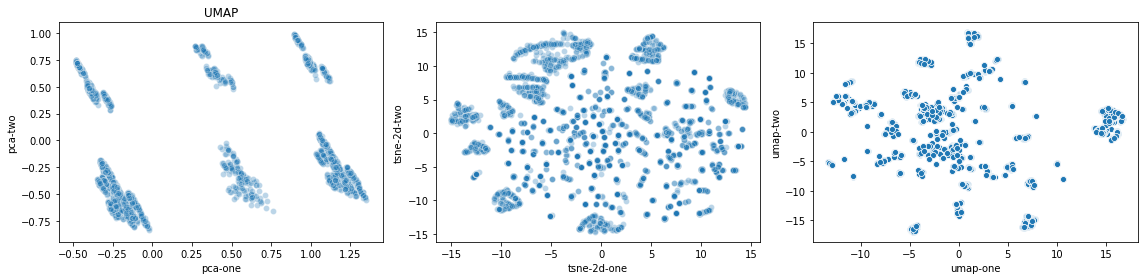

In [50]:
# Compare pca & tsne
plt.figure(figsize=(16,4))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax1.set_title('PCA')

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax1.set_title('TSNE')


ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x='umap-one', y='umap-two',
    data=df_subset,
    ax=ax3
)
ax1.set_title('UMAP')

plt.tight_layout()

## Clustering

### CAH

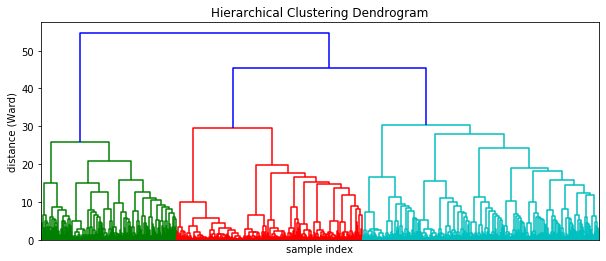

In [51]:
# Calculate the distance between each sample
Z = hierarchy.linkage(X_std, 'ward')

# Make the dendrogram
plt.figure(figsize=(10,4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.xticks([])
plt.show()

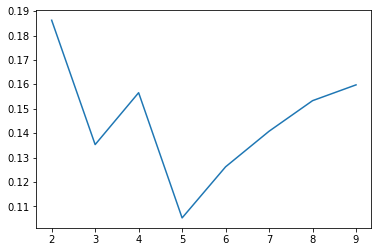

In [52]:
#CAH study
silhouettes = []
for num_cluster in range(2, 10):
    cls = AgglomerativeClustering(n_clusters=num_cluster)
    cls.fit(X_std)
    silh = metrics.silhouette_score(X_std, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,10),silhouettes)
plt.show()

In [53]:
clustering = AgglomerativeClustering(n_clusters=4)
clustering.fit(X_std)
df_subset['cluster_agg'] = clustering.labels_

In [54]:
#Cluster Visualisation
fig = px.scatter(df_subset.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color='cluster_agg', labels={'color':'cluster_agg'}, 
                 hover_data=['review_score','product_category_name_english_house'])
fig.update_layout(title="TSNE colored by cluster_agg")
fig.show()

### K-means

The number of ideal cluster would be 8 here. However, since we would like to limit the segmentation, we will choose 5 clusters for the segmentation. 

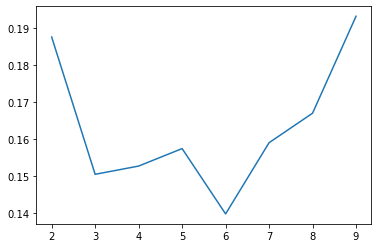

In [55]:
#K means study
silhouettes = []
for num_cluster in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_cluster, n_init=10,init='k-means++')
    cls.fit(X_std)
    silh = metrics.silhouette_score(X_std, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,10),silhouettes)
plt.show()

In [56]:
#Get better cluster number
km = cluster.KMeans(n_clusters=5)
km.fit(X_std)
df_subset['cluster'] = km.labels_

In [57]:
#Cluster Visualisation
fig = px.scatter(df_subset.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color='cluster', labels={'color':'cluster'}, 
                 hover_data=['review_score','product_category_name_english_house'])
fig.update_layout(title="TSNE colored by cluster")
fig.show()

In [58]:
#Visualisation PCA
fig = px.scatter(df_subset.reset_index(), x='pca-one', y='pca-two',#size='nb_orders',
                    color='cluster', labels={'color':'cluster'}, hover_data=['review_score'])
fig.update_layout(title="PCA colored by Cluster")
fig.show()

In [59]:
# #Umap visualisation
# fig = px.scatter(df_subset.reset_index(), x='umap-one', y='umap-two',
#                     color='cluster', labels={'color':'cluster'},
#                  hover_data=['review_score','product_category_name_english_house'])
# fig.update_layout(title="Umap colored by Cluster")
# fig.show()

### DBSCAN

The DBSCAN is not appropriate for this dataset. As we can see, when we change the epsilon, the number of cluster goes from over a hundred to only one of two.

In [67]:
for i in [x / 10.0 for x in range(1, 20, 5)]:
    clustering = DBSCAN(eps=i).fit(X_std)
    df_subset['cluster_dbs'] = clustering.labels_
    print(f"Number of clusters: {df_subset['cluster_dbs'].nunique()}, silhouette score={metrics.silhouette_score(X_std, clustering.labels_)} for epsilon = {i}")

Number of clusters: 29, silhouette score=-0.34924023314935587 for epsilon = 0.1
Number of clusters: 131, silhouette score=0.47170973188523757 for epsilon = 0.6
Number of clusters: 154, silhouette score=0.5207308760494883 for epsilon = 1.1
Number of clusters: 2, silhouette score=0.2033521644234123 for epsilon = 1.6


In [68]:
for i in [x for x in range(5, 30, 5)]:
    clustering = DBSCAN(min_samples=i).fit(X_std)
    df_subset['cluster_dbs'] = clustering.labels_
    print(f"Number of clusters: {df_subset['cluster_dbs'].nunique()}, silhouette score={metrics.silhouette_score(X_std, clustering.labels_)} for min_sample = {i}")

Number of clusters: 132, silhouette score=0.4262631604462187 for min_sample = 5
Number of clusters: 86, silhouette score=0.3514448971740367 for min_sample = 10
Number of clusters: 61, silhouette score=0.2960615517240247 for min_sample = 15
Number of clusters: 39, silhouette score=0.21745944464575637 for min_sample = 20
Number of clusters: 29, silhouette score=0.17585028174962183 for min_sample = 25


In [69]:
clustering = DBSCAN(eps=0.3,min_samples=20).fit(X_std)
df_subset['cluster_dbs'] = clustering.labels_

In [70]:
#Cluster Visualisation
fig = px.scatter(df_subset.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color='cluster_dbs', labels={'color':'cluster_hdbs'}, 
                 hover_data=['review_score','product_category_name_english_house'])
fig.update_layout(title="DBScan colored by cluster")
fig.show()

In [ ]:
# import hdbscan
# #HDBScan study
# silhouettes = []
# for num_cluster in range(2, 10):
#     cls = hdbscan.HDBSCAN(min_cluster_size=num_cluster)
# #     (n_clusters=num_cluster, n_init=10,init='k-means++')
#     cls.fit(X_std)
#     silh = metrics.silhouette_score(X_std, cls.labels_)
#     silhouettes.append(silh)

# plt.plot(range(2,10),silhouettes)
# plt.show()

## Cluster interpretation

Now that we have our clusters, the objective is to understand what are the common caracteristics between the customers.

### Univariate analysis

In [89]:
location = ['customer_state_DF', 'customer_state_ES', 'customer_state_GO',
'customer_state_MG', 'customer_state_PR', 'customer_state_RJ',
'customer_state_RS', 'customer_state_SC', 'customer_state_SP',
'customer_state_other']

#Product category
df1 = pd.DataFrame(data=np.array([i for i in range(0,df_subset['cluster'].nunique())]),columns=['cluster'])
#Get the location distribution within the different cluster
for i in location:
    df1[i] = pd.DataFrame(df_subset.groupby('cluster')[i].sum()).reset_index(drop=True)/df_subset.groupby('cluster')[i].sum().sum()
df1.drop(columns=['cluster'],inplace=True)

In [90]:
#Get product
product = ['product_category_name_english_art', 'product_category_name_english_baby',
'product_category_name_english_electronics', 'product_category_name_english_gift',
'product_category_name_english_health', 'product_category_name_english_house',
'product_category_name_english_industry', 'product_category_name_english_nan',
'product_category_name_english_office', 'product_category_name_english_others',
'product_category_name_english_perfumery']

#Product category
df2 = pd.DataFrame(data=np.array([i for i in range(0,df_subset['cluster'].nunique())]),columns=['cluster'])
#Get the category distribution within the different cluster
for i in product:
    df2[i] = pd.DataFrame(df_subset.groupby('cluster')[i].sum()).reset_index(drop=True)/df_subset.groupby('cluster')[i].sum().sum()
df2.drop(columns=['cluster'],inplace=True)

In [91]:
#Payment method
payment = ['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']

#Payment method 
df3 = pd.DataFrame(data=np.array([i for i in range(0,df_subset['cluster'].nunique())]),columns=['cluster'])
#Get the payment distribution within the different cluster
for i in payment:
    df3[i] = pd.DataFrame(df_subset.groupby('cluster')[i].sum()).reset_index(drop=True)/df_subset.groupby('cluster')[i].sum().sum()
df3.drop(columns=['cluster'],inplace=True)

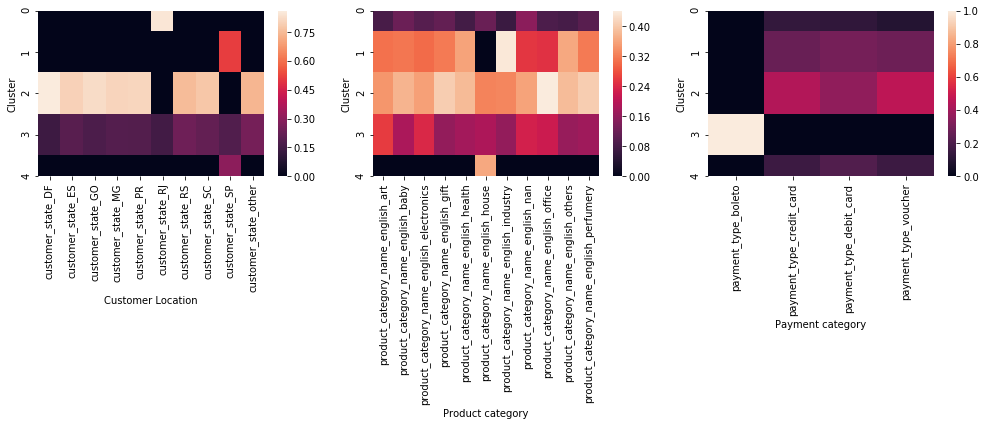

In [92]:
#Category and location visualisation
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#Visualisation with Heatmap
g1 = sns.heatmap(df1,ax=ax1)
g1.set_xlabel('Customer Location')
g1.set_ylabel('Cluster')

g2 = sns.heatmap(df2, ax=ax2)
g2.set_xlabel('Product category')
g2.set_ylabel('Cluster')

g3 = sns.heatmap(df3, ax=ax3)
g3.set_xlabel('Payment category')
g3.set_ylabel('Cluster')

plt.tight_layout(pad=1)

In [93]:
customer_exp = ['order_delivery_time', 'order_estimated_delivery_time',
'order_estimated_delivery_vs_actual','total_price','review_score', 'lenght_review', 'nb_items_bought','distance']

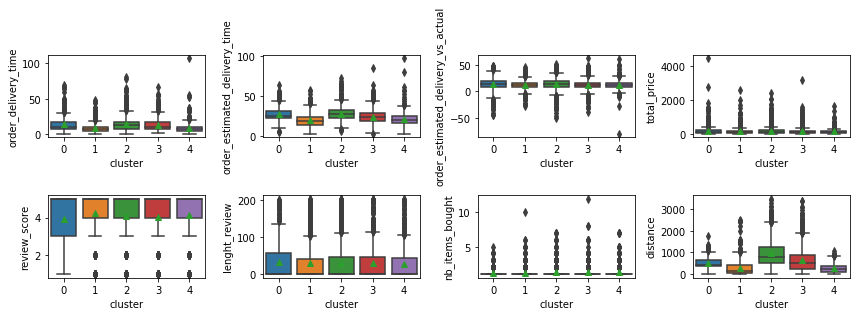

In [94]:
#Plot cluster information
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,feat in enumerate(customer_exp):
    ax = fig.add_subplot(3, 4, i+1)
    sns.boxplot(x="cluster", y=feat, data=df_subset,showmeans=True)

plt.tight_layout()

### Random Forest

From this study, it seems that the following features enable us to describe each cluster: customer location, product category, payment type, distance between customer and seller. We will also conduct a random forest, with the cluster being the output, in order to determine which features have the higher variance regarding our clustering.  
The following graph highlights the features with the most variance, we can see that the features represented are the same as the one we had by doing an univariate analysis.

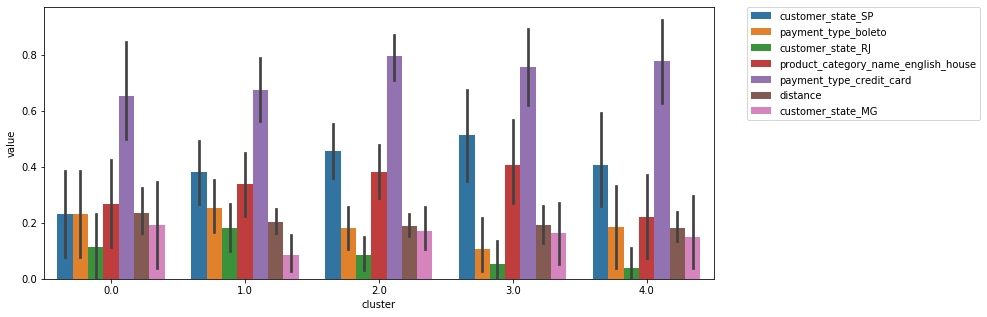

In [88]:
from sklearn.ensemble import RandomForestClassifier

#Dataset
X_rf = df.iloc[idx_random,:].copy()
X_rf['cluster'] = df_subset['cluster']
X, y = X_rf.iloc[:,:-1], X_rf.iloc[:,-1]

clf = RandomForestClassifier(n_estimators=100).fit(X, y)
#Get the features importance

data = np.array([clf.feature_importances_, X.columns]).T
columns = list(pd.DataFrame(data, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7).Feature.values)

#Vizualisation
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[idx_random,:].copy()))
df_scaled.columns = df.columns
df_scaled['cluster'] = df_subset['cluster']

tidy = df_scaled[columns+['cluster']].melt(id_vars='cluster')

fig = plt.figure(figsize=(12,5))
g = sns.barplot(x='cluster', y='value', hue='variable', data=tidy)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

If we are to use the feature importance from the RFC, we should ensure that we are able to have a good prediction on the cluster and so study the accuracy of our prediction, with the confusion matrix for instance. However, we will not do it for this project.

## RFM

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.  

We will create those 3 features for each customer.

In [30]:
rfm = df[['nb_days_last_order', 'nb_orders', 'total_money']]
rfm.columns = ['recency','frequency','money']

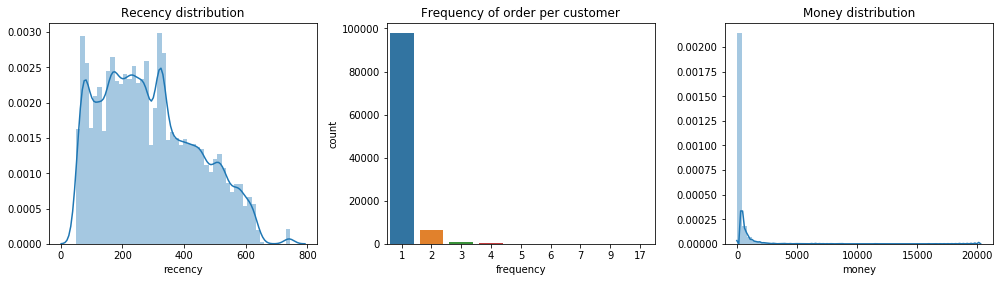

In [31]:
#RFM distribution
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.countplot(rfm['frequency'],ax=ax2)
ax2.set_title('Frequency of order per customer')

g1 = sns.distplot(rfm['recency'],ax=ax1)
ax1.set_title('Recency distribution')

sns.distplot(rfm['money'],ax=ax3)
ax3.set_title('Money distribution')
plt.tight_layout(pad=1.0)

### Scoring

In [32]:
#Get quantile & Scoring
q_25 = []
q_50 = []
q_75 = []

for i in rfm.columns:
    q_25.append(rfm[i].quantile(q=0.25))
    q_50.append(rfm[i].quantile(q=0.50))
    q_75.append(rfm[i].quantile(q=0.75))

def get_score_asc(q1,q2,q3,x):
    if x<q1:
        return 1
    if q1<=x<q2:
        return 2
    if q2<=x<q3:
        return 3
    if q3<=x:
        return 4

def get_score_desc(q1,q2,q3,x):
    if x<q1:
        return 4
    if q1<=x<q2:
        return 3
    if q2<=x<q3:
        return 2
    if q3<=x:
        return 1

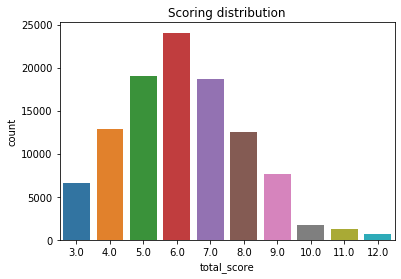

In [33]:
#Remove warning
pd.options.mode.chained_assignment = None

#Apply scoring for each customer
rfm['recency_score'] = rfm['recency'].apply(lambda x: get_score_desc(q_25[0],q_50[0],q_75[0],x))
rfm['frequency_score'] = rfm['frequency'].apply(lambda x: 1 if x==1 else (2 if x==3 else 4))
rfm['money_score'] = rfm['money'].apply(lambda x: get_score_asc(q_25[2],q_50[2],q_75[2],x))
rfm['total_score'] = rfm.apply(lambda row: row['recency_score']+row['frequency_score']+row['money_score'],axis=1)

#Plot result
g = sns.countplot(rfm['total_score'])
g.set_title('Scoring distribution')
plt.show()

**Segments Definition**
As explained earlier, RFM uses three variables: Recency, Frequency, Monetary Value in order to segment the Customer Base.. I segmented the dataset as follows:

- Inactive: customers with no orders in the last two years
- Cold: no orders in the last year, with at least one order in the last two years
- Warm: last purchase between six months and one year ago
- Active High Value: at least one purchase in the last six months, average order value below the overall average, more than one order overall
- Active Low Value: at least one purchase in the last six months, and average order value below the overall average, more than one order overall
- New: first and unique purchase made in the last six months

In [34]:
# segmentation
avg_purchase=rfm['money'].mean()
rfm['segment'] = np.nan 
rfm.loc[rfm['recency']>365*2, 'segment']= 'inactive'
rfm.loc[(rfm['recency']<=365*2) & (rfm['recency']>365), 'segment'] = 'cold'
rfm.loc[(rfm['recency']<=365) & (rfm['recency']>365/2), 'segment'] = 'warm'
rfm.loc[(rfm['recency']<=365/2) & (rfm['money']>=avg_purchase), 'segment'] = 'active high value'
rfm.loc[(rfm['recency']<=365/2) & (rfm['money']<avg_purchase), 'segment'] = 'active low value'
#OVERWRITE SOME OF THE PREVIOUS 'ACTIVE LOW/HI VALUE"
rfm.loc[(rfm['recency']<=365/2) & (rfm['frequency']==1), 'segment'] = 'new'

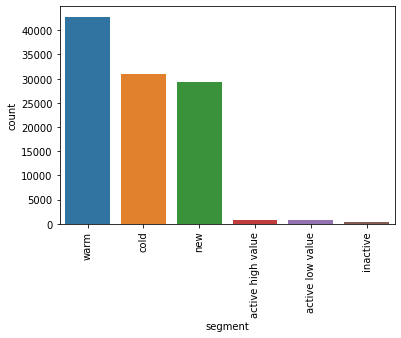

In [35]:
#Plot distribution
g = sns.countplot(x='segment',data=rfm,order=rfm['segment'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

In [105]:
#Plot scaled rfm with new segment
standard_scaler1 = preprocessing.StandardScaler()
rfm_scaled = pd.DataFrame(standard_scaler1.fit_transform(rfm[['recency','frequency','money']]))
rfm_scaled.columns = rfm.columns[:3]
rfm_scaled['segment'] = rfm['segment']
rfm_scaled = rfm_scaled.iloc[idx_random,:].copy()

fig = px.scatter_3d(rfm_scaled.reset_index(), x='recency', y='frequency',z='money',
                   color='segment',labels={'color':'segment'})
fig.update_layout(title="RFM with segment")
fig.show()

### Clustering

We will compare the result found with the RFM segmentation with those coming from a clustering algorithm (CAH). We will take 6 clusters (as we have 6 above) in order to compare the results.

In [104]:
X_rfm = rfm[['recency','frequency','money']].iloc[idx_random,:].copy()
standard_scaler = preprocessing.StandardScaler()
X_rfm_std = standard_scaler.fit_transform(X_rfm)

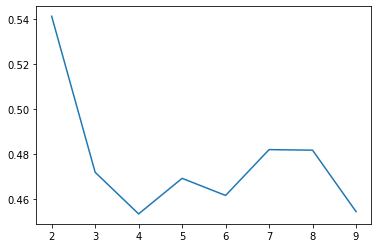

In [98]:
#CAH study
silhouettes = []
for num_cluster in range(2, 10):
    cls = AgglomerativeClustering(n_clusters=num_cluster)
    cls.fit(X_rfm_std)
    silh = metrics.silhouette_score(X_rfm_std, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2,10),silhouettes)
plt.show()

In [106]:
# #K means study
# silhouettes = []
# for num_cluster in range(2, 10):
#     cls = cluster.KMeans(n_clusters=num_cluster, n_init=10,init='k-means++')
#     cls.fit(X_std)
#     silh = metrics.silhouette_score(X_rfm_std, cls.labels_)
#     silhouettes.append(silh)

# plt.plot(range(2,10),silhouettes)
# plt.show()

In [99]:
#Get better cluster number
cah = AgglomerativeClustering(n_clusters=6)
cah.fit(X_rfm_std)
# km = cluster.KMeans(n_clusters=6)
# km.fit(X_rfm_std)

X_rfm_std = pd.DataFrame(X_rfm_std)
X_rfm_std.columns = rfm.columns[:3]
df_subset1 = X_rfm_std
df_subset1['cluster'] = cah.labels_

df_subset1['total_score'] = rfm['total_score'].loc[idx_random].reset_index(drop=True)

In [100]:
fig = px.scatter_3d(df_subset1.reset_index(), x='recency', y='frequency',z='money',
                   color='cluster',labels={'color':'cluster'})
fig.update_layout(title="RFM with clusters")
fig.show()

In [108]:
# #Compare clustering with scoring
# fig = plt.figure(figsize=(12,6))
# from mpl_toolkits.mplot3d import Axes3D
# df_subset1['segment'] = rfm['segment'].loc[idx_random].reset_index(drop=True)

# ax1 = fig.add_subplot(1,2,1,projection='3d')
# ax2 = fig.add_subplot(1,2,2,projection='3d')

# # ax1 = Axes3D(fig)
# # ax2 = Axes3D(fig)

# ax1.scatter(xs=df_subset1['recency'], ys=df_subset1['frequency'],zs=df_subset1['money'], c=df_subset1['cluster'])
# ax1.set_xlabel('Recency')
# ax1.set_ylabel('Frequency')
# ax1.set_zlabel('Money')
# ax1.legend(labels=df_subset1['cluster'])
# ax1.set_title('3d plot with K means cluster')

# ax2.scatter(xs=df_subset1['recency'], ys=df_subset1['frequency'],zs=df_subset1['money'], c=df_subset1['total_score'])
# ax2.set_xlabel('Recency')
# ax2.set_ylabel('Frequency')
# ax2.set_zlabel('Money')
# ax2.legend(df_subset1['segment'])
# ax2.set_title('3d plot with segment')

# plt.tight_layout()

## Conclusion

Segmentation comparasion:
- RFM:
    - ++: easy to understand, no need for a heavy computational
    - --: Use only 3 features, for this dataset, lots of unique command
- Clustering with all features: 
    - ++: use every features
    - --: Computationaly heavy